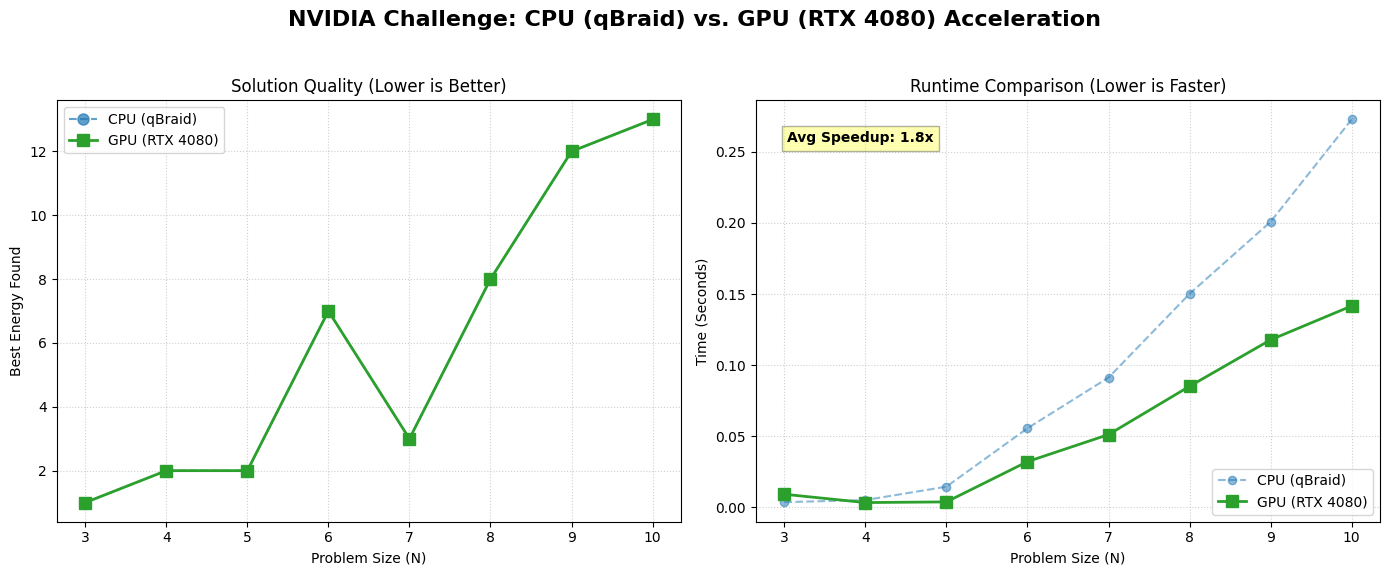

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load Data
df_cpu = pd.read_csv('/content/drive/MyDrive/FluxQuapacitors/Notebooks/Nvidia/Comparison data/cpu_results_qbraid.csv')
df_gpu = pd.read_csv('/content/drive/MyDrive/FluxQuapacitors/Notebooks/Nvidia/Comparison data/gpu_results_local.csv')

# 2. Setup the Plotting Canvas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle('NVIDIA Challenge: CPU (qBraid) vs. GPU (RTX 4080) Acceleration', fontsize=16, weight='bold')

# --- GRAPH 1: OPTIMIZATION QUALITY (Energy) ---
# Purpose: Prove that the GPU version is just as accurate as the CPU version
ax1.plot(df_cpu['N'], df_cpu['Best_Energy'], 'o--', label='CPU (qBraid)', color='#1f77b4', markersize=8, alpha=0.7)
ax1.plot(df_gpu['N'], df_gpu['Best_Energy'], 's-', label='GPU (RTX 4080)', color='#2ca02c', markersize=8, linewidth=2)

ax1.set_title('Solution Quality (Lower is Better)', fontsize=12)
ax1.set_xlabel('Problem Size (N)', fontsize=10)
ax1.set_ylabel('Best Energy Found', fontsize=10)
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend()
# Integer ticks for N
ax1.set_xticks(df_cpu['N'])

# --- GRAPH 2: RUNTIME PERFORMANCE (Time) ---
# Purpose: Show the massive speedup
ax2.plot(df_cpu['N'], df_cpu['Time_Seconds'], 'o--', label='CPU (qBraid)', color='#1f77b4', markersize=6, alpha=0.5)
ax2.plot(df_gpu['N'], df_gpu['Time_Seconds'], 's-', label='GPU (RTX 4080)', color='#2ca02c', markersize=8, linewidth=2)

ax2.set_title('Runtime Comparison (Lower is Faster)', fontsize=12)
ax2.set_xlabel('Problem Size (N)', fontsize=10)
ax2.set_ylabel('Time (Seconds)', fontsize=10)
ax2.grid(True, linestyle=':', alpha=0.6)
ax2.legend()
ax2.set_xticks(df_cpu['N'])

# Optional: Add "Speedup Factor" annotation
speedup = df_cpu['Time_Seconds'].mean() / df_gpu['Time_Seconds'].mean()
ax2.text(0.05, 0.9, f"Avg Speedup: {speedup:.1f}x", transform=ax2.transAxes,
         bbox=dict(facecolor='yellow', alpha=0.3), fontsize=10, weight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Make room for suptitle
plt.savefig('benchmark_comparison.png', dpi=300) # Save for your presentation
plt.show()

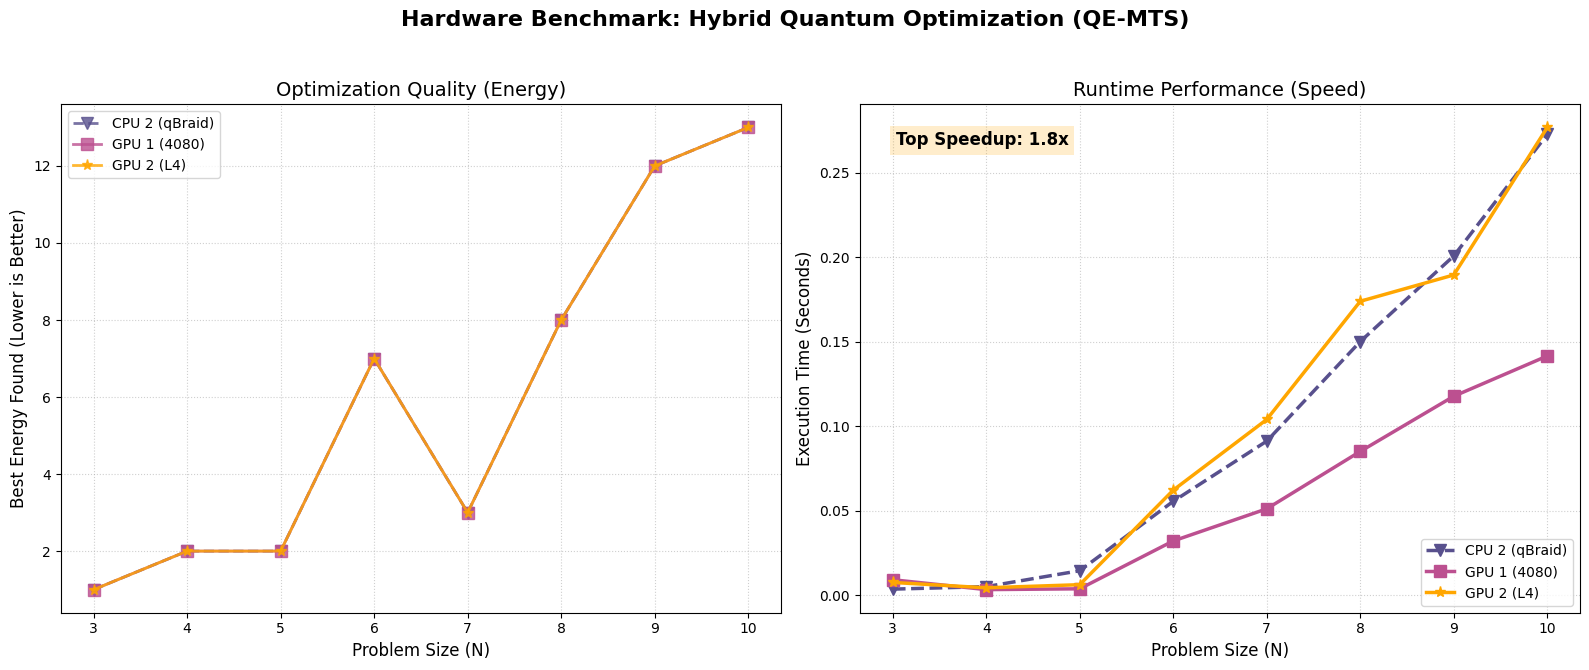

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ==========================================
# 1. LOAD DATA (OR GENERATE DUMMY DATA)
# ==========================================
filenames = {   # e.g., Intel i7 / Laptop
    'qBraid': '/content/drive/MyDrive/FluxQuapacitors/Notebooks/Nvidia/Comparison data/cpu_results_qbraid.csv',   # e.g., AMD EPYC / Server
    'local GPU': '/content/drive/MyDrive/FluxQuapacitors/Notebooks/Nvidia/Comparison data/gpu_results_local.csv',   # e.g., NVIDIA T4 (Colab Default)
    'L4 GPU': '/content/drive/MyDrive/FluxQuapacitors/Notebooks/Nvidia/Comparison data/gpu_results _L4.csv', # e.g., NVIDIA A100 (Premium)
}

data = {}

for label, fname in filenames.items():
        data[label] = pd.read_csv(fname)


# ==========================================
# 2. PLOTTING
# ==========================================
# Use a clean style
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Title
fig.suptitle('Hardware Benchmark: Hybrid Quantum Optimization (QE-MTS)', fontsize=16, weight='bold', y=0.98)

# --- CONFIG FOR LINES ---
# Define colors and styles for clear distinction
styles = {
    'qBraid': {'color': '#58508d', 'marker': 'v', 'style': '--', 'label': 'CPU 2 (qBraid)'},
    'local GPU': {'color': '#bc5090', 'marker': 's', 'style': '-',  'label': 'GPU 1 (4080)'},
    'L4 GPU': {'color': '#ffa600', 'marker': '*', 'style': '-',  'label': 'GPU 2 (L4)'},
}

# --- PLOT 1: ENERGY (Correctness Check) ---
for name, df in data.items():
    s = styles[name]
    ax1.plot(df['N'], df['Best_Energy'],
             marker=s['marker'], linestyle=s['style'], color=s['color'],
             label=s['label'], linewidth=2, markersize=8, alpha=0.8)

ax1.set_title('Optimization Quality (Energy)', fontsize=14)
ax1.set_xlabel('Problem Size (N)', fontsize=12)
ax1.set_ylabel('Best Energy Found (Lower is Better)', fontsize=12)
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend(fontsize=10)
# Force integer ticks for N
if not data['qBraid'].empty:
    ax1.set_xticks(data['qBraid']['N'])

# --- PLOT 2: RUNTIME (Performance) ---
for name, df in data.items():
    s = styles[name]
    ax2.plot(df['N'], df['Time_Seconds'],
             marker=s['marker'], linestyle=s['style'], color=s['color'],
             label=s['label'], linewidth=2.5, markersize=8)

ax2.set_title('Runtime Performance (Speed)', fontsize=14)
ax2.set_xlabel('Problem Size (N)', fontsize=12)
ax2.set_ylabel('Execution Time (Seconds)', fontsize=12)
ax2.grid(True, linestyle=':', alpha=0.6)
ax2.legend(fontsize=10)
if not data['qBraid'].empty:
    ax2.set_xticks(data['qBraid']['N'])

# Optional: Add a text box for the "Winner"
fastest_time = data['local GPU']['Time_Seconds'].mean()
slowest_time = data['qBraid']['Time_Seconds'].mean()
speedup = slowest_time / fastest_time

ax2.text(0.05, 0.92, f"Top Speedup: {speedup:.1f}x", transform=ax2.transAxes,
         bbox=dict(facecolor='#ffa600', alpha=0.2, edgecolor='none'),
         fontsize=12, weight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for title
plt.show()

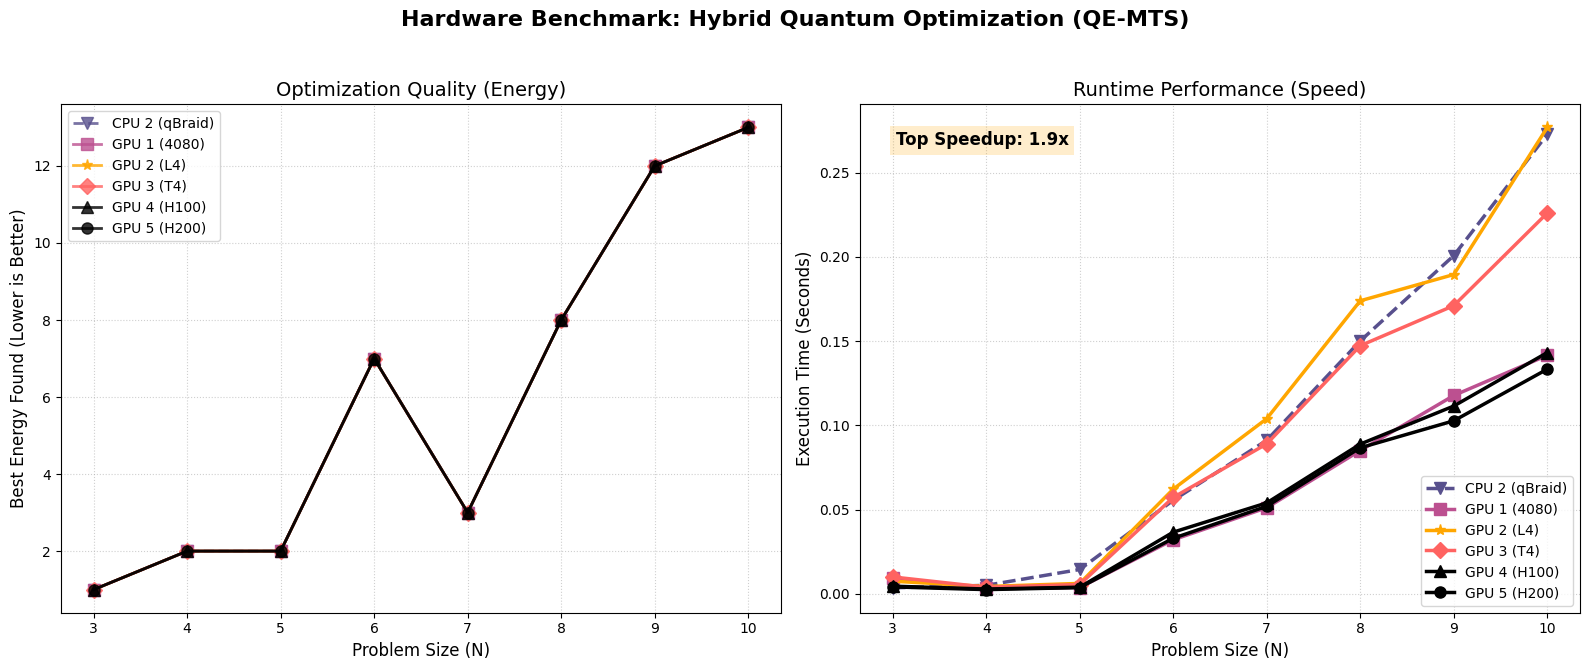

In [32]:
# ==========================================
# 1. LOAD DATA (OR GENERATE DUMMY DATA)
# ==========================================
filenames = {   # e.g., Intel i7 / Laptop
    'qBraid': '/content/drive/MyDrive/FluxQuapacitors/Notebooks/Nvidia/Comparison data/cpu_results_qbraid.csv',   # e.g., AMD EPYC / Server
    'local GPU': '/content/drive/MyDrive/FluxQuapacitors/Notebooks/Nvidia/Comparison data/gpu_results_local.csv',   # e.g., NVIDIA T4 (Colab Default)
    'L4 GPU': '/content/drive/MyDrive/FluxQuapacitors/Notebooks/Nvidia/Comparison data/gpu_results _L4.csv',
    'T4 GPU': '/content/drive/MyDrive/FluxQuapacitors/Notebooks/Nvidia/Comparison data/gpu_results_T4.csv',
    'H100 GPU': '/content/drive/MyDrive/FluxQuapacitors/Notebooks/Nvidia/Comparison data/gpu_results_H100.csv',
    'H200 GPU': '/content/drive/MyDrive/FluxQuapacitors/Notebooks/Nvidia/Comparison data/gpu_results_H200.csv' # e.g., NVIDIA A100 (Premium)
}

data = {}

for label, fname in filenames.items():
        data[label] = pd.read_csv(fname)


# ==========================================
# 2. PLOTTING
# ==========================================
# Use a clean style
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Title
fig.suptitle('Hardware Benchmark: Hybrid Quantum Optimization (QE-MTS)', fontsize=16, weight='bold', y=0.98)

# --- CONFIG FOR LINES ---
# Define colors and styles for clear distinction
styles = {
    'qBraid': {'color': '#58508d', 'marker': 'v', 'style': '--', 'label': 'CPU 2 (qBraid)'},
    'local GPU': {'color': '#bc5090', 'marker': 's', 'style': '-',  'label': 'GPU 1 (4080)'},
    'L4 GPU': {'color': '#ffa600', 'marker': '*', 'style': '-',  'label': 'GPU 2 (L4)'},
    'T4 GPU': {'color': '#ff6361', 'marker': 'D', 'style': '-',  'label': 'GPU 3 (T4)'},
    'H100 GPU': {'color': '#000000', 'marker': '^', 'style': '-',  'label': 'GPU 4 (H100)'},
    'H200 GPU': {'color': '#000000', 'marker': 'o', 'style': '-',  'label': 'GPU 5 (H200)'},
}

# --- PLOT 1: ENERGY (Correctness Check) ---
for name, df in data.items():
    s = styles[name]
    ax1.plot(df['N'], df['Best_Energy'],
             marker=s['marker'], linestyle=s['style'], color=s['color'],
             label=s['label'], linewidth=2, markersize=8, alpha=0.8)

ax1.set_title('Optimization Quality (Energy)', fontsize=14)
ax1.set_xlabel('Problem Size (N)', fontsize=12)
ax1.set_ylabel('Best Energy Found (Lower is Better)', fontsize=12)
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend(fontsize=10)
# Force integer ticks for N
if not data['qBraid'].empty:
    ax1.set_xticks(data['qBraid']['N'])

# --- PLOT 2: RUNTIME (Performance) ---
for name, df in data.items():
    s = styles[name]
    ax2.plot(df['N'], df['Time_Seconds'],
             marker=s['marker'], linestyle=s['style'], color=s['color'],
             label=s['label'], linewidth=2.5, markersize=8)

ax2.set_title('Runtime Performance (Speed)', fontsize=14)
ax2.set_xlabel('Problem Size (N)', fontsize=12)
ax2.set_ylabel('Execution Time (Seconds)', fontsize=12)
ax2.grid(True, linestyle=':', alpha=0.6)
ax2.legend(fontsize=10)
if not data['qBraid'].empty:
    ax2.set_xticks(data['qBraid']['N'])

# Optional: Add a text box for the "Winner"
fastest_time = data['H200 GPU']['Time_Seconds'].mean()
slowest_time = data['qBraid']['Time_Seconds'].mean()
speedup = slowest_time / fastest_time

ax2.text(0.05, 0.92, f"Top Speedup: {speedup:.1f}x", transform=ax2.transAxes,
         bbox=dict(facecolor='#ffa600', alpha=0.2, edgecolor='none'),
         fontsize=12, weight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for title
plt.show()